In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from src.data_io.track_io import _load_track_data
from pathlib import Path

In [7]:
# --- parameters ---
root = Path(r"Y:\killi_dynamics")
project_name = "20251019_BC1-NLS_52-80hpf"
tracking_config = "tracking_20251102"

# load cell tracks
tracks_df, sphere_df = _load_track_data(root=root,
                                         project_name=project_name,
                                         tracking_config=tracking_config)

# load cluster tracks
symm_dir = root / "symmetry_breaking" / project_name / tracking_config
# save final tracks
stitched_ts = pd.read_csv(symm_dir / "cell_clusters_tracked.csv")
stitched_ts.head()

r  d_thresh  t  cluster_id_local  size  theta_mean  theta_max  \
0  499.613331      30.0  0                 0    10    0.081351   0.149210   
1  499.613331      30.0  0                 1     6    0.045400   0.068161   
2  499.613331      30.0  0                 2     5    0.029484   0.048893   
3  499.613331      30.0  0                 3     6    0.053625   0.079994   
4  499.613331      30.0  0                 4     5    0.032537   0.055394   

       area_cap   fluo_mean  deg_mean  ...  n_obs_x start_t_y end_t_y  \
0  17426.364799  203.571861  2.200000  ...        8         0      10   
1   3641.834387  248.961553  2.000000  ...       11         0      32   
2   1874.220193  140.198435  3.200000  ...       13         0      12   
3   5015.363081  182.509803  1.666667  ...        2         0       3   
4   2405.628239  191.970538  2.000000  ...        5         0       4   

  duration_y mean_size_y  max_size_y mean_fluo_y  mean_deg_y  mean_nn_dist_y  \
0         11    6.888889          10  217.727725    1.872751       19.032904   
1         33    7.093750          10  218.067617    2.227009       18.973656   
2         13    5.000000           5  138.037787    3.046154       20.188196   
3          4    6.666667           7  181.849833    2.079365       21.744246   
4          5    5.000000           5  193.650496    2.000000       17.467339   

   n_obs_y  
0        9  
1       32  
2       13  
3        3  
4        5  

[5 rows x 35 columns]

In [8]:
stitched_ts.columns

Index(['r', 'd_thresh', 't', 'cluster_id_local', 'size', 'theta_mean',
       'theta_max', 'area_cap', 'fluo_mean', 'deg_mean', 'nn_dist_mean',
       'member_index', 'member_positions', 'member_track_id', 'centroid_u',
       'cluster_id', 'merged_from', 'start_t_x', 'end_t_x', 'duration_x',
       'mean_size_x', 'max_size_x', 'mean_fluo_x', 'mean_deg_x',
       'mean_nn_dist_x', 'n_obs_x', 'start_t_y', 'end_t_y', 'duration_y',
       'mean_size_y', 'max_size_y', 'mean_fluo_y', 'mean_deg_y',
       'mean_nn_dist_y', 'n_obs_y'],
      dtype='object')

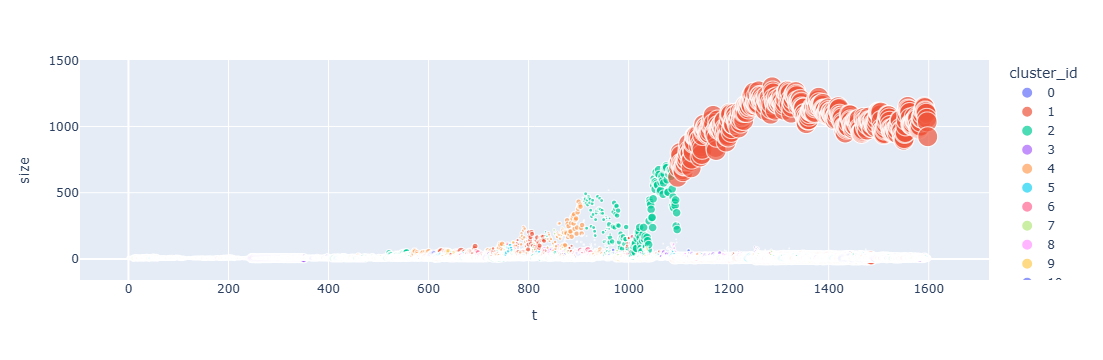

In [12]:
# stitched_ts["cluster_id"] = stitched_ts["cluster_id"].astype(str)
fig = px.scatter(stitched_ts, x="t", y="size", size="duration_x", color="cluster_id")
fig.show()